In [6]:
from prody import *

from pylab import *

ion()

In [15]:
LinB = parsePDB('1cv2', chain='A')
selection = LinB.select('resnum 4 to 296')
LinB_ca = selection.select('name CA')

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 1cv2 downloaded (1cv2.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 2750 atoms and 1 coordinate set(s) were parsed in 0.10s.


In [16]:
gnm = GNM('LinB')
gnm.buildKirchhoff(LinB_ca)
gnm.calcModes(n_modes='all')

@> Kirchhoff was built in 0.03s.
@> 292 modes were calculated in 0.16s.


In [17]:
prs_mat, eff, sens = calcPerturbResponse(gnm)

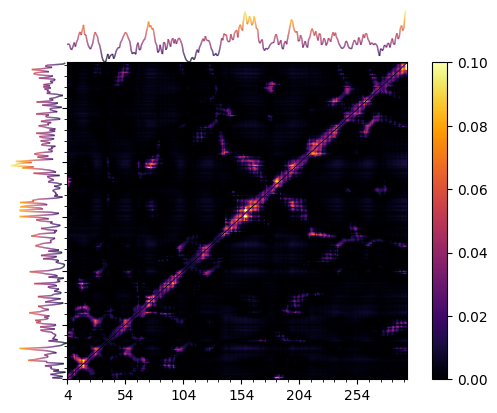

In [18]:
showPerturbResponse(prs_mat, LinB_ca, 
                    cmap=cm.inferno, 
                    norm=Normalize(0,np.max(prs_mat)/10));

In [19]:

prs_mat, effectiveness, sensitivity = calcPerturbResponse(gnm)

In [20]:
effectiveness_cutoff = np.percentile(effectiveness, 100) 
sensitivity_cutoff = np.percentile(sensitivity, 100)

effective_residues = [residue for residue, value in zip(LinB_ca.getResnames(), effectiveness) if value < effectiveness_cutoff]
sensitive_residues = [residue for residue, value in zip(LinB_ca.getResnames(), sensitivity) if value < sensitivity_cutoff]

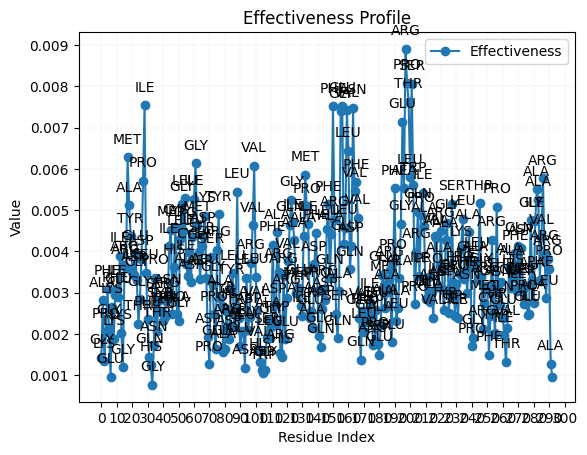

In [21]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()


ax.plot(effectiveness, label='Effectiveness', marker='o')




for i, value in enumerate(effective_residues):
    ax.annotate(value, (i, effectiveness[i]), textcoords="offset points", xytext=(0,10), ha='center')
grid(b=True, which='both', axis='both', linewidth=0.08)
x = np.linspace(0, 10, 20)
plt.xticks(np.arange(min(x), max(x)+300, 10))


ax.legend()
ax.set_xlabel('Residue Index')
ax.set_ylabel('Value')
ax.set_title('Effectiveness Profile')

plt.show()

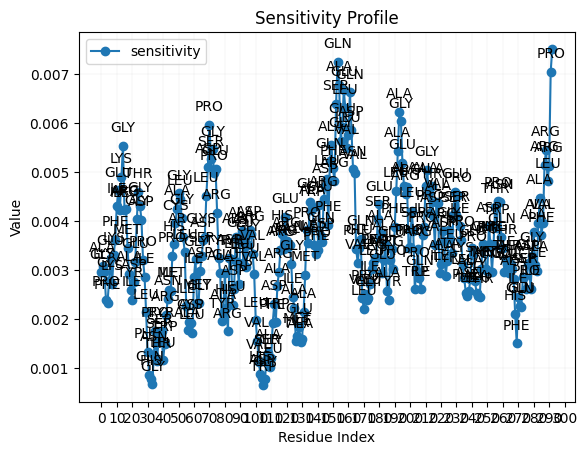

In [22]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()


ax.plot(sensitivity, label='sensitivity', marker='o')




for j, value in enumerate(sensitive_residues):
    ax.annotate(value, (j, sensitivity[j]), textcoords="offset points", xytext=(0,10), ha='center')

grid(b=True, which='both', axis='both', linewidth=0.08)
x = np.linspace(0, 10, 20)
plt.xticks(np.arange(min(x), max(x)+300, 10))


ax.legend()
ax.set_xlabel('Residue Index')
ax.set_ylabel('Value')
ax.set_title('Sensitivity Profile')


plt.show()